Data Challenge

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

train_features = pd.read_csv('train_x_region.csv')
test_features = pd.read_csv('test_x_region.csv')
train_labels = pd.read_csv('train_y.csv')

In [24]:
concat_train = pd.concat([train_features, train_labels], axis=1)
concat_train

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0


In [25]:
concat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              242 non-null    int64  
 1   Country                           242 non-null    object 
 2   Happiness Rank                    242 non-null    int64  
 3   Happiness Score                   242 non-null    float64
 4   Economy (GDP per Capita)          242 non-null    float64
 5   Family                            242 non-null    float64
 6   Health (Life Expectancy)          242 non-null    float64
 7   Freedom                           242 non-null    float64
 8   Trust (Government Corruption)     242 non-null    float64
 9   Generosity                        242 non-null    float64
 10  Population Estimate               242 non-null    int64  
 11  Region                            242 non-null    object 
 12  Immigrat

In [ ]:
train_features.min()
train_features.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           61 non-null     int64  
 1   Country                        61 non-null     object 
 2   Happiness Rank                 61 non-null     int64  
 3   Happiness Score                61 non-null     float64
 4   Economy (GDP per Capita)       61 non-null     float64
 5   Family                         61 non-null     float64
 6   Health (Life Expectancy)       61 non-null     float64
 7   Freedom                        61 non-null     float64
 8   Trust (Government Corruption)  61 non-null     float64
 9   Generosity                     61 non-null     float64
 10  Population Estimate            61 non-null     int64  
 11  Region                         61 non-null     object 
dtypes: float64(7), int64(3), object(2)
memory usage: 5.8

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           242 non-null    int64  
 1   Country                        242 non-null    object 
 2   Happiness Rank                 242 non-null    int64  
 3   Happiness Score                242 non-null    float64
 4   Economy (GDP per Capita)       242 non-null    float64
 5   Family                         242 non-null    float64
 6   Health (Life Expectancy)       242 non-null    float64
 7   Freedom                        242 non-null    float64
 8   Trust (Government Corruption)  242 non-null    float64
 9   Generosity                     242 non-null    float64
 10  Population Estimate            242 non-null    int64  
 11  Region                         242 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 2

In [ ]:
train_labels

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


In [27]:
corr = concat_train.corr()
corr["Immigration to the United States"].sort_values(ascending = False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [ ]:
train_labels.describe()

,Immigration to the United States
count,242.000000
mean,13090.400826
std,24587.371903
min,116.000000
25%,1567.500000
50%,4167.000000
75%,12984.750000
max,172726.000000


I don't really see a pattern happening. I noticed that the more happy and bigger the family have a higher immigration. I assume this because with a bigger family they would want a better quality of living for them.

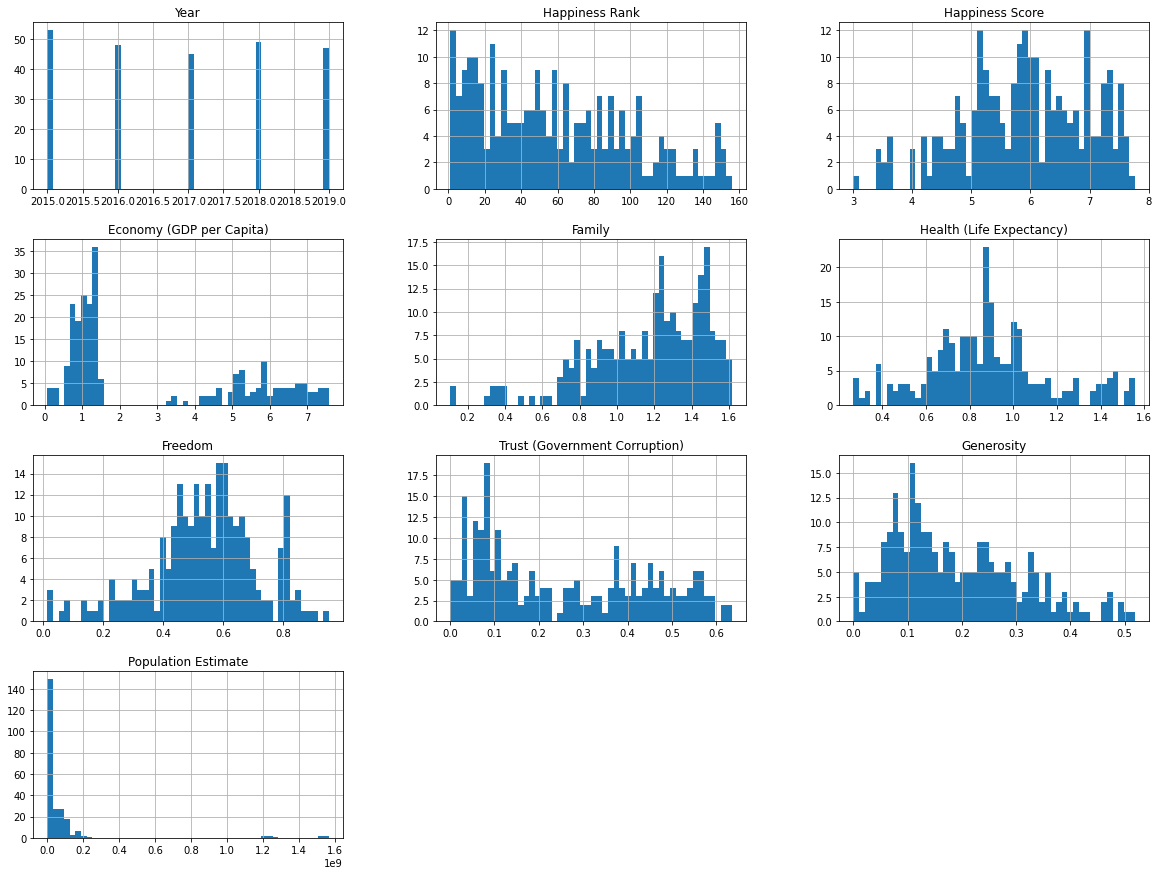

In [ ]:
import matplotlib.pyplot as plt 

train_features.hist(bins=50,figsize=(20,15));
plt.show()

array([[<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='Happiness Rank'>],
       [<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Healt

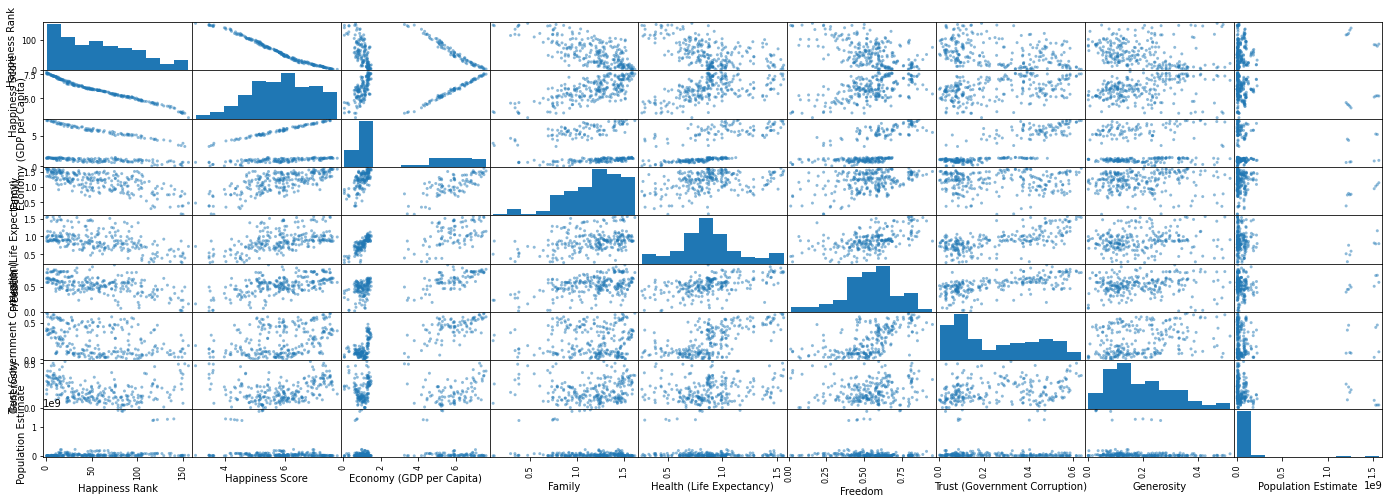

In [ ]:
attributes = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Population Estimate', 'Region']
scatter_matrix(train_features[attributes], figsize=(24,8))

In [31]:
concat_train.drop(["Country", "Region","Immigration to the United States","Year"], axis=1, inplace=True)
concat_train

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
0,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176
1,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393
2,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652
3,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729
4,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622
...,...,...,...,...,...,...,...,...,...
237,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788
238,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008
239,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294
240,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331


I train a dataset using Linear Regression and Lasso to see which one is the best.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Linear Regression

In [34]:
lg = LinearRegression()
lg.fit(concat_train, train_labels)

LinearRegression()

In [68]:
lgPredic = lg.predict(concat_train)

mean_squared_error(train_labels, lgPredic)

458140341.00590366

In [69]:
np.sqrt(mean_squared_error(train_labels, lgPredic))

21404.213160167874

Lasso

In [64]:
lasso = Lasso(alpha=10)
lasso.fit(concat_train, train_labels)

Lasso(alpha=10)

In [65]:
lassoPredic = lasso.predict(concat_train)

mean_squared_error(train_labels, lassoPredic)

458209473.4493623

In [66]:
np.sqrt(mean_squared_error(train_labels, lassoPredic))

21405.82802531503

Conclusion
After testing Lasso and Linear Regression, the results were almost identical
There was a slight difference of .01.

In [57]:
lassoPredic = pd.DataFrame(lassoPredic, columns=['Immigration to the United States'])
lassoPredic.to_csv('predictions.csv', index=None)